# Predição de Renda do Censo Adulto - Pré-processamento de Dados

Este notebook pré-processa o conjunto de dados do Censo Adulto para prever se a renda de uma pessoa está acima ou abaixo de $50K.




## 1. Carregar Conjunto de Dados

In [1]:
import pandas as pd

column_names = [
    "age",
    "workclass",
    "final_weight",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income",
]

df = pd.read_csv("datasets/adult.data", names=column_names, skipinitialspace=True)

print(f"Dados do conjunto de dados: {df.shape}")
print("Primeiras 10 linhas:")
df.head(10)

Dados do conjunto de dados: (32561, 15)
Primeiras 10 linhas:


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
print("Informações estatísticas do conjunto de dados:")
df.describe(include="all")

Informações estatísticas do conjunto de dados:


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 1.1 Remover coluna education, que possui as mesmas informações que education-num

In [3]:
df.drop("education", axis=1, inplace=True)
df.head()

,age,workclass,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1.2 Remover Dados Faltantes

In [4]:
# Verificar o tamanho original do conjunto de dados
print(f"Tamanho original do conjunto de dados: {df.shape}")

# No conjunto de dados Adult, valores faltantes são representados como caracteres '?'
print("\nVerificando valores '?' em cada coluna:")
contagem_faltantes = {}
for col in df.columns:
    if df[col].dtype == "object":  # Verificar apenas colunas de texto
        contagem_faltante = (df[col] == "?").sum()
        if contagem_faltante > 0:
            contagem_faltantes[col] = contagem_faltante
            print(
                f"{col}: {contagem_faltante} valores faltantes ({contagem_faltante/len(df)*100:.2f}%)"
            )

if not contagem_faltantes:
    print("Nenhum valor '?' encontrado no conjunto de dados.")

# Também verificar valores NaN reais
contagem_nan = df.isnull().sum()
total_nan = contagem_nan.sum()
if total_nan > 0:
    print(f"\nValores NaN reais encontrados: {total_nan}")
    print(contagem_nan[contagem_nan > 0])

# Substituir '?' por NaN para facilitar remoção
df_limpo = df.replace("?", pd.NA)

# Remover todas as linhas com quaisquer valores faltantes
df_limpo = df_limpo.dropna()

# Mostrar os resultados
print(f"\nTamanho do conjunto de dados após remover dados faltantes: {df_limpo.shape}")
print(f"Linhas removidas: {len(df) - len(df_limpo)}")
print(f"Porcentagem de dados mantidos: {len(df_limpo)/len(df)*100:.2f}%")

Tamanho original do conjunto de dados: (32561, 14)

Verificando valores '?' em cada coluna:
workclass: 1836 valores faltantes (5.64%)
occupation: 1843 valores faltantes (5.66%)
native_country: 583 valores faltantes (1.79%)

Tamanho do conjunto de dados após remover dados faltantes: (30162, 14)
Linhas removidas: 2399
Porcentagem de dados mantidos: 92.63%


### 1.3 Função para visualização de outliers

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colunas numéricas para análise
colunas_numericas = [
    "age",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
]


def plotar_boxplot_outliers(
    nome_coluna,
    dados=df_limpo,
    figsize=(8, 6),
    percentil_inferior=0.25,
    percentil_superior=0.75,
    fator_iqr=1.5,
):
    """
    Função para plotar boxplot de uma coluna específica para análise de outliers

    Parâmetros:
    - nome_coluna: str - nome da coluna a ser analisada
    - dados: DataFrame - conjunto de dados (padrão: df_limpo)
    - figsize: tuple - tamanho da figura (padrão: (8, 6))
    - percentil_inferior: float - percentil inferior (padrão: 0.25)
    - percentil_superior: float - percentil superior (padrão: 0.75)
    - fator_iqr: float - fator multiplicador do IQR para definir outliers (padrão: 1.5)

    Retorna:
    - DataFrame com os outliers identificados
    """
    # Verificar se a coluna existe no dataset
    if nome_coluna not in dados.columns:
        print(f"Erro: A coluna '{nome_coluna}' não existe no dataset.")
        print(f"Colunas disponíveis: {list(dados.columns)}")
        return

    # Validar percentis
    if not (0 < percentil_inferior < percentil_superior < 1):
        print(
            "Erro: Os percentis devem estar entre 0 e 1, com percentil_inferior < percentil_superior"
        )
        return

    # Configurar o estilo dos gráficos
    plt.style.use("default")
    sns.set_palette("husl")

    # Criar o gráfico
    fig, ax = plt.subplots(figsize=figsize)

    # Criar boxplot
    ax.boxplot(
        dados[nome_coluna],
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", alpha=0.7),
    )
    ax.set_title(f"Análise de Outliers - {nome_coluna}", fontsize=14)
    ax.set_ylabel(nome_coluna)
    ax.grid(True, alpha=0.3)

    # Calcular percentis e IQR
    perc_inf = dados[nome_coluna].quantile(percentil_inferior)
    perc_sup = dados[nome_coluna].quantile(percentil_superior)
    IQR = perc_sup - perc_inf
    limite_inferior = perc_inf - fator_iqr * IQR
    limite_superior = perc_sup + fator_iqr * IQR

    # Identificar outliers
    outliers = dados[
        (dados[nome_coluna] < limite_inferior) | (dados[nome_coluna] > limite_superior)
    ]

    # Definir nomes apropriados para os percentis
    if percentil_inferior == 0.25 and percentil_superior == 0.75:
        nome_inf, nome_sup = "Q1", "Q3"
    else:
        nome_inf = f"P{int(percentil_inferior*100)}"
        nome_sup = f"P{int(percentil_superior*100)}"

    print("\nAnálise de Outliers:")
    print(f"{nome_inf} ({percentil_inferior*100:.1f}%): {perc_inf}")
    print(f"{nome_sup} ({percentil_superior*100:.1f}%): {perc_sup}")
    print(f"IQR ({nome_sup} - {nome_inf}): {IQR}")
    print(f"Limite inferior: {limite_inferior}")
    print(f"Limite superior: {limite_superior}")
    print(f"Fator IQR usado: {fator_iqr}")
    print(
        f"Número de outliers: {len(outliers)} ({len(outliers)/len(dados)*100:.2f}% dos dados)"
    )

    plt.tight_layout()
    plt.show()

    return outliers

### 1.3.1 Visualização geral de todas as colunas numéricas com os percentis padrões

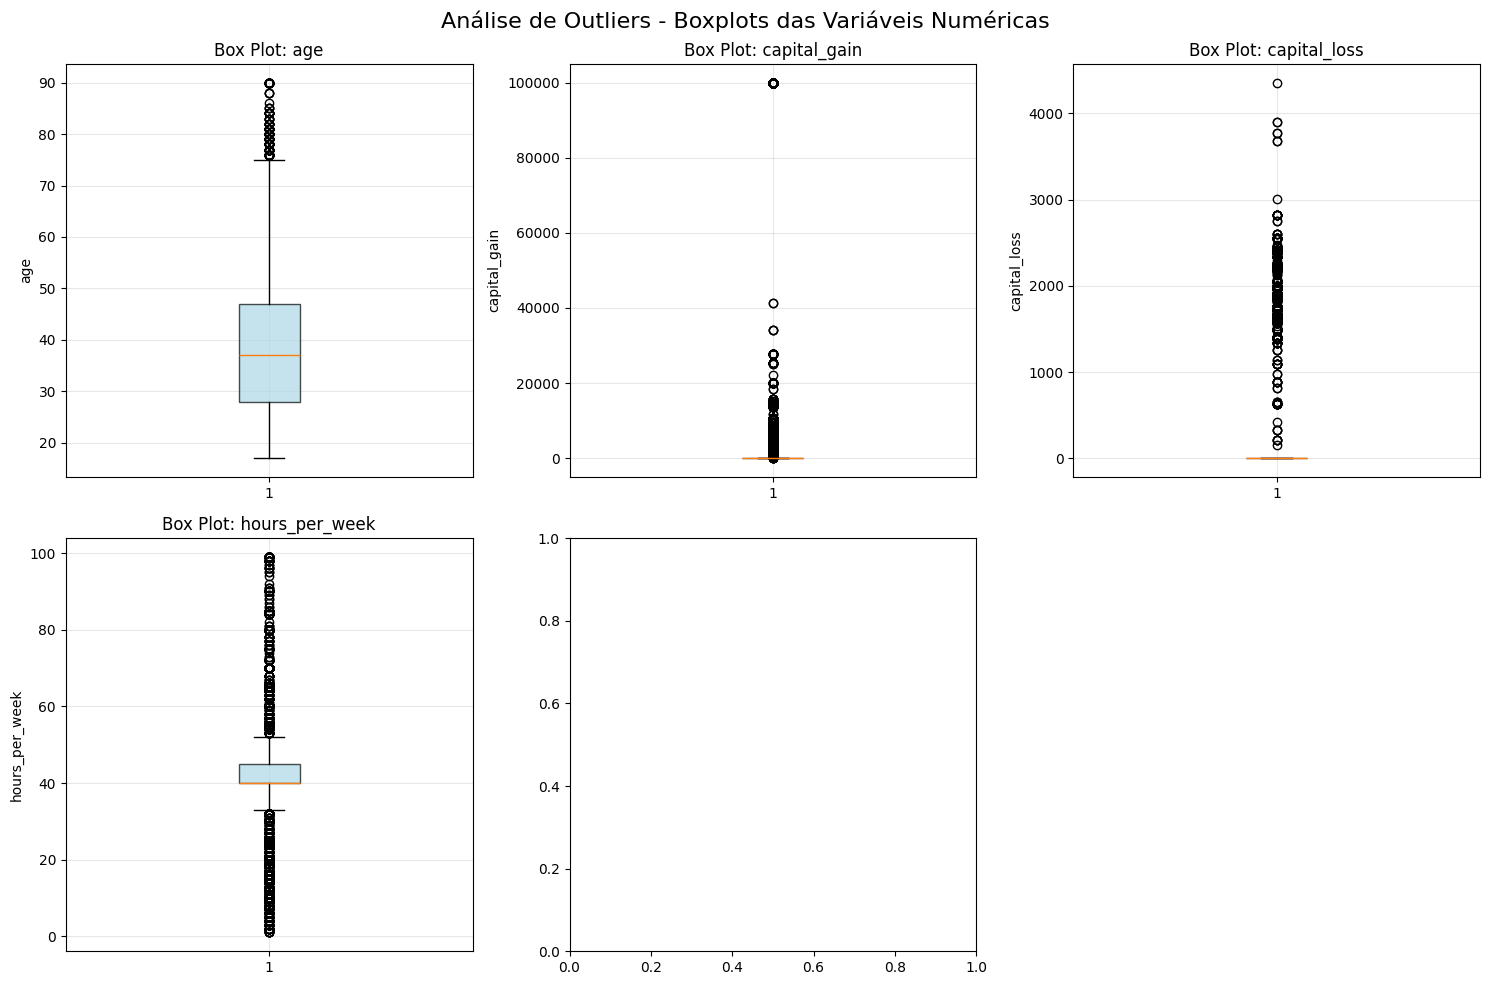

In [6]:
# Criar subplots para visualizar outliers nas colunas numéricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Análise de Outliers - Boxplots das Variáveis Numéricas", fontsize=16)

# Criar boxplots
for i, coluna in enumerate(colunas_numericas):
    row = i // 3
    col = i % 3

    axes[row, col].boxplot(
        df_limpo[coluna],
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", alpha=0.7),
    )
    axes[row, col].set_title(f"Box Plot: {coluna}")
    axes[row, col].set_ylabel(coluna)
    axes[row, col].grid(True, alpha=0.3)

# Remover subplot vazio
axes[1, 2].remove()

plt.tight_layout()
plt.show()

### 1.4 Coluna "age"

#### 1.4.1 Dados gerais

Estatísticas da coluna 'age':
count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

Análise de Outliers:
P45 (45.0%): 35.0
P75 (75.0%): 47.0
IQR (P75 - P45): 12.0
Limite inferior: 17.0
Limite superior: 65.0
Fator IQR usado: 1.5
Número de outliers: 839 (2.78% dos dados)


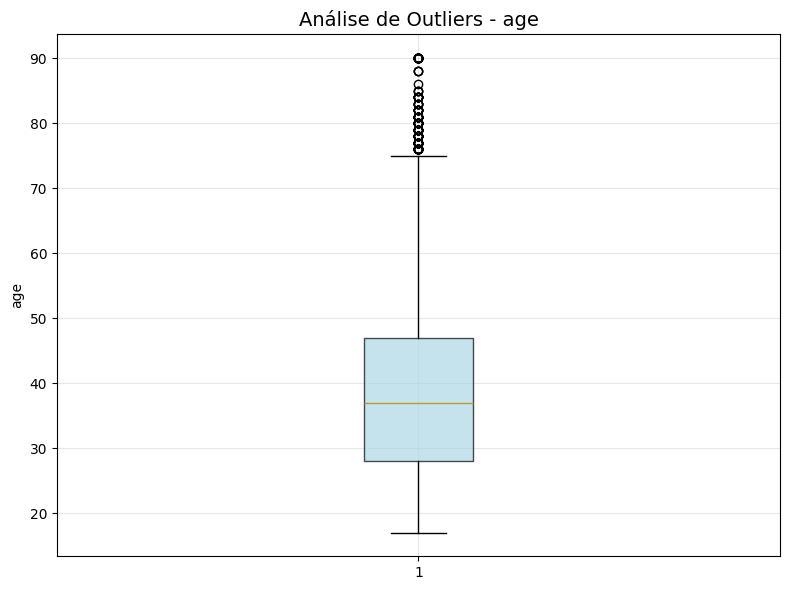

In [7]:
print("Estatísticas da coluna 'age':")
print(df_limpo["age"].describe())

age_outliers = plotar_boxplot_outliers(
    "age", percentil_inferior=0.45, percentil_superior=0.75
)

#### 1.4.2 Removendo os outliers

In [8]:
df_limpo = df_limpo.drop(age_outliers.index)
print("Estatísticas após remoção de outliers:")
print(df_limpo["age"].describe())

Estatísticas após remoção de outliers:
count    29323.000000
mean        37.483341
std         11.987527
min         17.000000
25%         28.000000
50%         37.000000
75%         46.000000
max         65.000000
Name: age, dtype: float64


### 1.5 Análise e remoção dos outliers da coluna "capital_gain"

#### 1.5.1 Dados gerais

Estatísticas da coluna 'capital_gain':
count    29323.000000
mean      1063.376223
std       7361.165910
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

Análise de Outliers:
P1 (1.0%): 0.0
P99 (99.0%): 15024.0
IQR (P99 - P1): 15024.0
Limite inferior: -22536.0
Limite superior: 37560.0
Fator IQR usado: 1.5
Número de outliers: 150 (0.50% dos dados)


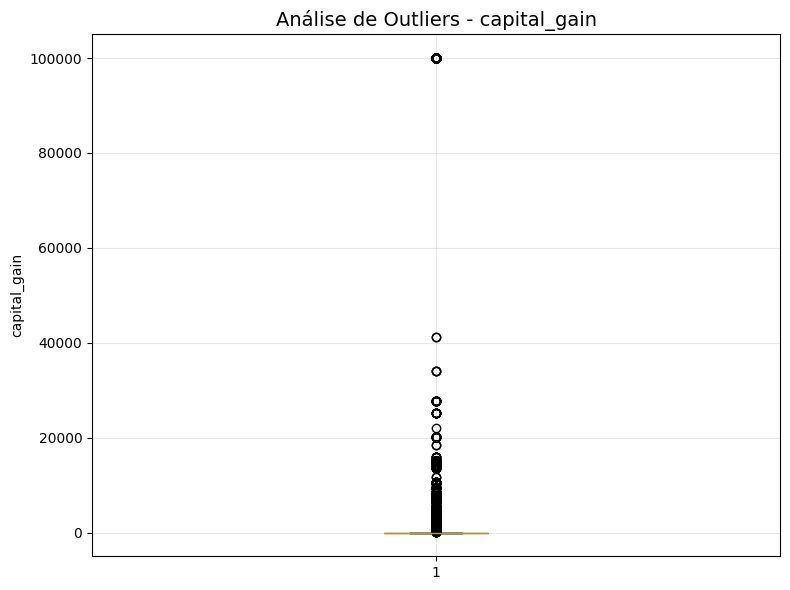

In [9]:
print("Estatísticas da coluna 'capital_gain':")
print(df_limpo["capital_gain"].describe())

capital_gain_outliers = plotar_boxplot_outliers(
    "capital_gain", percentil_inferior=0.01, percentil_superior=0.99
)

Apesar do número de outliers ser pequeno, o resultado provavelmente é bom para evitar que o modelo seja influenciado por esses valores extremos.

#### 1.5.2 Removendo os outliers

In [10]:
df_limpo = df_limpo.drop(capital_gain_outliers.index, errors="ignore")
print("Estatísticas após remoção de outliers:")
print(df_limpo["capital_gain"].describe())

Estatísticas após remoção de outliers:
count    29178.000000
mean       575.738707
std       2476.649069
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      34095.000000
Name: capital_gain, dtype: float64


### 1.6 Análise e remoção dos outliers da coluna "capital_loss"

#### 1.6.1 Dados gerais

Estatísticas da coluna 'capital_loss':
count    29178.000000
mean        87.510624
std        400.557073
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.000000
Name: capital_loss, dtype: float64

Análise de Outliers:
P1 (1.0%): 0.0
P96 (96.0%): 1590.0
IQR (P96 - P1): 1590.0
Limite inferior: -2385.0
Limite superior: 3975.0
Fator IQR usado: 1.5
Número de outliers: 1 (0.00% dos dados)


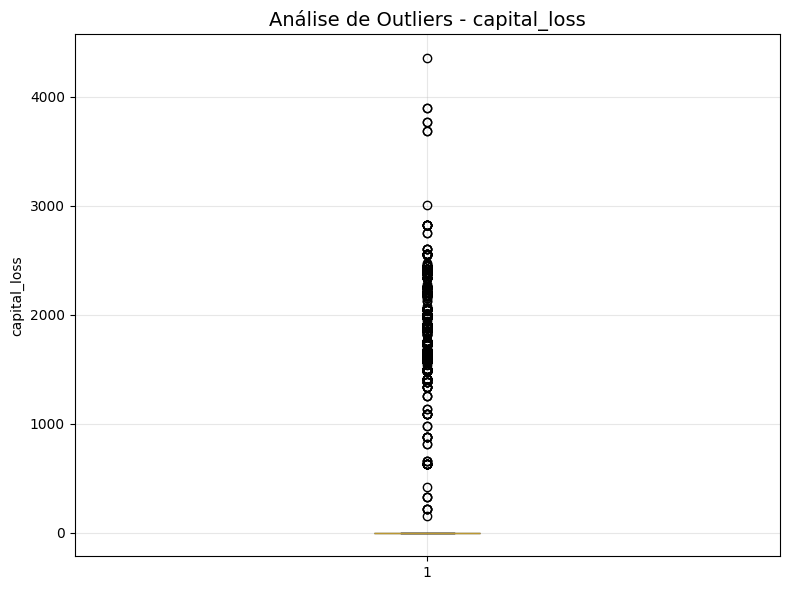

In [11]:
print("Estatísticas da coluna 'capital_loss':")
print(df_limpo["capital_loss"].describe())

capital_loss_outliers = plotar_boxplot_outliers(
    "capital_loss", percentil_inferior=0.01, percentil_superior=0.96
)

Removendo somente um outlier.

#### 1.6.2 Removendo os outliers

In [12]:
df_limpo = df_limpo.drop(capital_loss_outliers.index, errors="ignore")
print("Estatísticas após remoção de outliers:")
print(df_limpo["capital_loss"].describe())

Estatísticas após remoção de outliers:
count    29178.000000
mean        87.510624
std        400.557073
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.000000
Name: capital_loss, dtype: float64


### 1.7 Análise e remoção dos outliers da coluna "hours_per_week"

#### 1.7.1 Dados gerais

Estatísticas da coluna 'hours_per_week':
count    29178.000000
mean        41.170197
std         11.695100
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

Análise de Outliers:
P19 (19.0%): 35.0
P75 (75.0%): 45.0
IQR (P75 - P19): 10.0
Limite inferior: 20.0
Limite superior: 60.0
Fator IQR usado: 1.5
Número de outliers: 2386 (7.91% dos dados)


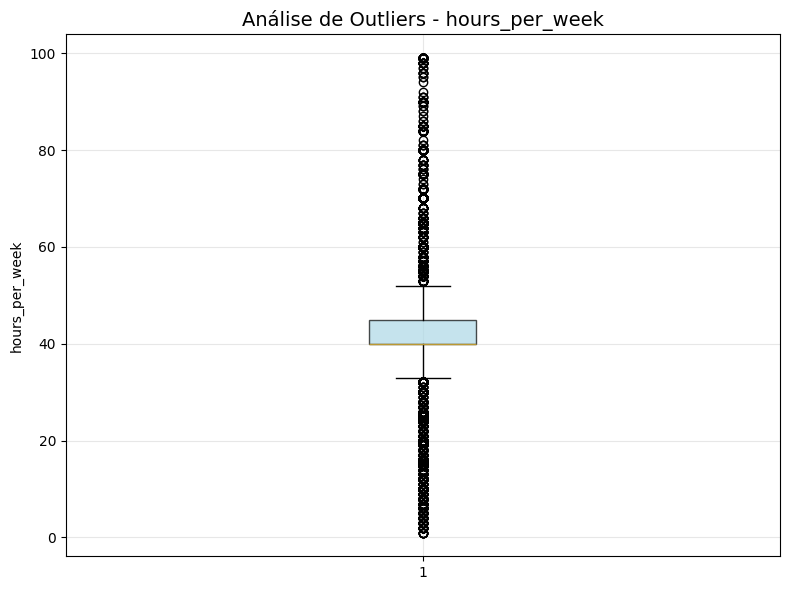

In [13]:
print("Estatísticas da coluna 'hours_per_week':")
print(df_limpo["hours_per_week"].describe())

hours_per_week_outliers = plotar_boxplot_outliers(
    "hours_per_week", percentil_inferior=0.19
)

#### 1.7.2 Removendo os outliers

In [14]:
df_limpo = df_limpo.drop(hours_per_week_outliers.index, errors="ignore")
print("Estatísticas após remoção de outliers:")
print(df_limpo["hours_per_week"].describe())

Estatísticas após remoção de outliers:
count    27034.000000
mean        41.152364
std          8.208604
min         20.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         60.000000
Name: hours_per_week, dtype: float64


## 2. Transformação de Colunas Categóricas em Números

Para facilitar o processo de machine learning, vamos transformar cada coluna categórica em números.
Vamos fazer isso coluna por coluna, na ordem das colunas do dataset.

In [15]:
# Primeiro, vamos identificar as colunas categóricas e seus valores únicos
print("Analisando colunas categóricas:")
print(f"Dataset shape: {df_limpo.shape}")
print()

colunas_categoricas = df_limpo.select_dtypes(include=["object"]).columns
print(f"Colunas categóricas encontradas: {list(colunas_categoricas)}")
print()

Analisando colunas categóricas:
Dataset shape: (27034, 14)

Colunas categóricas encontradas: ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']



### 2.1 Transformação das colunas utilizando o método `map`

In [16]:
# Fazer uma cópia para as transformações
df_transformado = df_limpo.copy()

for coluna in colunas_categoricas:
    print()
    valores_unicos = df_transformado[coluna].unique()
    valores_mapeados = dict()
    print(f"Valores únicos em {coluna}:")
    print(f"  Valores: {sorted(valores_unicos)}")

    for index, valor_unico in enumerate(valores_unicos):
        valores_mapeados[valor_unico] = index

    df_transformado[coluna] = df_transformado[coluna].map(valores_mapeados)

print(f"\nDataFrame após transformação categórica: {df_transformado.shape}")


Valores únicos em workclass:
  Valores: ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

Valores únicos em marital_status:
  Valores: ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

Valores únicos em occupation:
  Valores: ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

Valores únicos em relationship:
  Valores: ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

Valores únicos em race:
  Valores: ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

Valores únicos em sex:
  Valores: ['Female', 'Male']

Valores únicos em native_country:
  Valores: ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Re


Valores únicos em income:
  Valores: ['<=50K', '>50K']

DataFrame após transformação categórica: (27034, 14)


## 3. Normalização das Colunas Numéricas

Para melhorar o desempenho dos algoritmos de machine learning, vamos normalizar as colunas numéricas usando **StandardScaler** (padronização Z-score).

A normalização transforma os dados para que tenham **média 0** e **desvio padrão 1**, o que é importante quando as variáveis têm escalas muito diferentes.

**Fórmula**: `valor_normalizado = (valor_original - média) / desvio_padrão`

In [17]:
# Verificar as colunas numéricas disponíveis
print(f"Colunas numéricas para normalização: {colunas_numericas}")
print(f"Shape atual dos dados: {df_transformado.shape}")

Colunas numéricas para normalização: ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
Shape atual dos dados: (27034, 14)


### 3.1 Estatísticas antes da Normalização

In [18]:
from sklearn.preprocessing import StandardScaler

print("Estatísticas das colunas numéricas antes da normalização:")

for coluna in colunas_numericas:
    print(f"\nColuna {coluna.upper()}:")
    print(f"   Média:         {df_transformado[coluna].mean():.2f}")
    print(f"   Desvio Padrão: {df_transformado[coluna].std():.2f}")
    print(f"   Mínimo:        {df_transformado[coluna].min()}")
    print(f"   Máximo:        {df_transformado[coluna].max()}")
    print(f"   Mediana:       {df_transformado[coluna].median():.2f}")

Estatísticas das colunas numéricas antes da normalização:

Coluna AGE:
   Média:         37.67
   Desvio Padrão: 11.80
   Mínimo:        17
   Máximo:        65
   Mediana:       37.00

Coluna CAPITAL_GAIN:
   Média:         586.52
   Desvio Padrão: 2488.52
   Mínimo:        0
   Máximo:        34095
   Mediana:       0.00

Coluna CAPITAL_LOSS:
   Média:         86.81
   Desvio Padrão: 398.82
   Mínimo:        0
   Máximo:        3900
   Mediana:       0.00

Coluna HOURS_PER_WEEK:
   Média:         41.15
   Desvio Padrão: 8.21
   Mínimo:        20
   Máximo:        60
   Mediana:       40.00


### 3.2 Aplicando a Normalização

In [19]:
# Criar uma cópia dos dados transformados para normalização
df_normalizado = df_transformado.copy()

# Inicializar o StandardScaler
scaler = StandardScaler()

print(f"Colunas a serem normalizadas: {colunas_numericas}")

# Aplicar fit_transform apenas nas colunas numéricas
df_normalizado[colunas_numericas] = scaler.fit_transform(
    df_normalizado[colunas_numericas]
)

print(f"\nNormalização concluída!")
print(f"Shape do DataFrame normalizado: {df_normalizado.shape}")

Colunas a serem normalizadas: ['age', 'capital_gain', 'capital_loss', 'hours_per_week']

Normalização concluída!
Shape do DataFrame normalizado: (27034, 14)


### 3.3 Estatísticas APÓS a Normalização

In [20]:
print("ESTATÍSTICAS DAS COLUNAS NUMÉRICAS APÓS A NORMALIZAÇÃO:")

for coluna in colunas_numericas:
    print(f"\nColuna {coluna.upper()}:")
    print(f"   Média:         {df_normalizado[coluna].mean():.6f}")
    print(f"   Desvio Padrão: {df_normalizado[coluna].std():.6f}")
    print(f"   Mínimo:        {df_normalizado[coluna].min():.3f}")
    print(f"   Máximo:        {df_normalizado[coluna].max():.3f}")
    print(f"   Mediana:       {df_normalizado[coluna].median():.6f}")

ESTATÍSTICAS DAS COLUNAS NUMÉRICAS APÓS A NORMALIZAÇÃO:

Coluna AGE:
   Média:         0.000000
   Desvio Padrão: 1.000018
   Mínimo:        -1.752
   Máximo:        2.316
   Mediana:       -0.056968

Coluna CAPITAL_GAIN:
   Média:         -0.000000
   Desvio Padrão: 1.000018
   Mínimo:        -0.236
   Máximo:        13.465
   Mediana:       -0.235695

Coluna CAPITAL_LOSS:
   Média:         -0.000000
   Desvio Padrão: 1.000018
   Mínimo:        -0.218
   Máximo:        9.561
   Mediana:       -0.217680

Coluna HOURS_PER_WEEK:
   Média:         -0.000000
   Desvio Padrão: 1.000018
   Mínimo:        -2.577
   Máximo:        2.296
   Mediana:       -0.140387


### 3.4 Visualização das Distribuições Normalizadas

/tmp/ipykernel_218963/1885647775.py:50: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/media/NX/PC-Network-Share/vsc/facul/2025.1/ML2025.1/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/NX/PC-Network-Share/vsc/facul/2025.1/ML2025.1/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


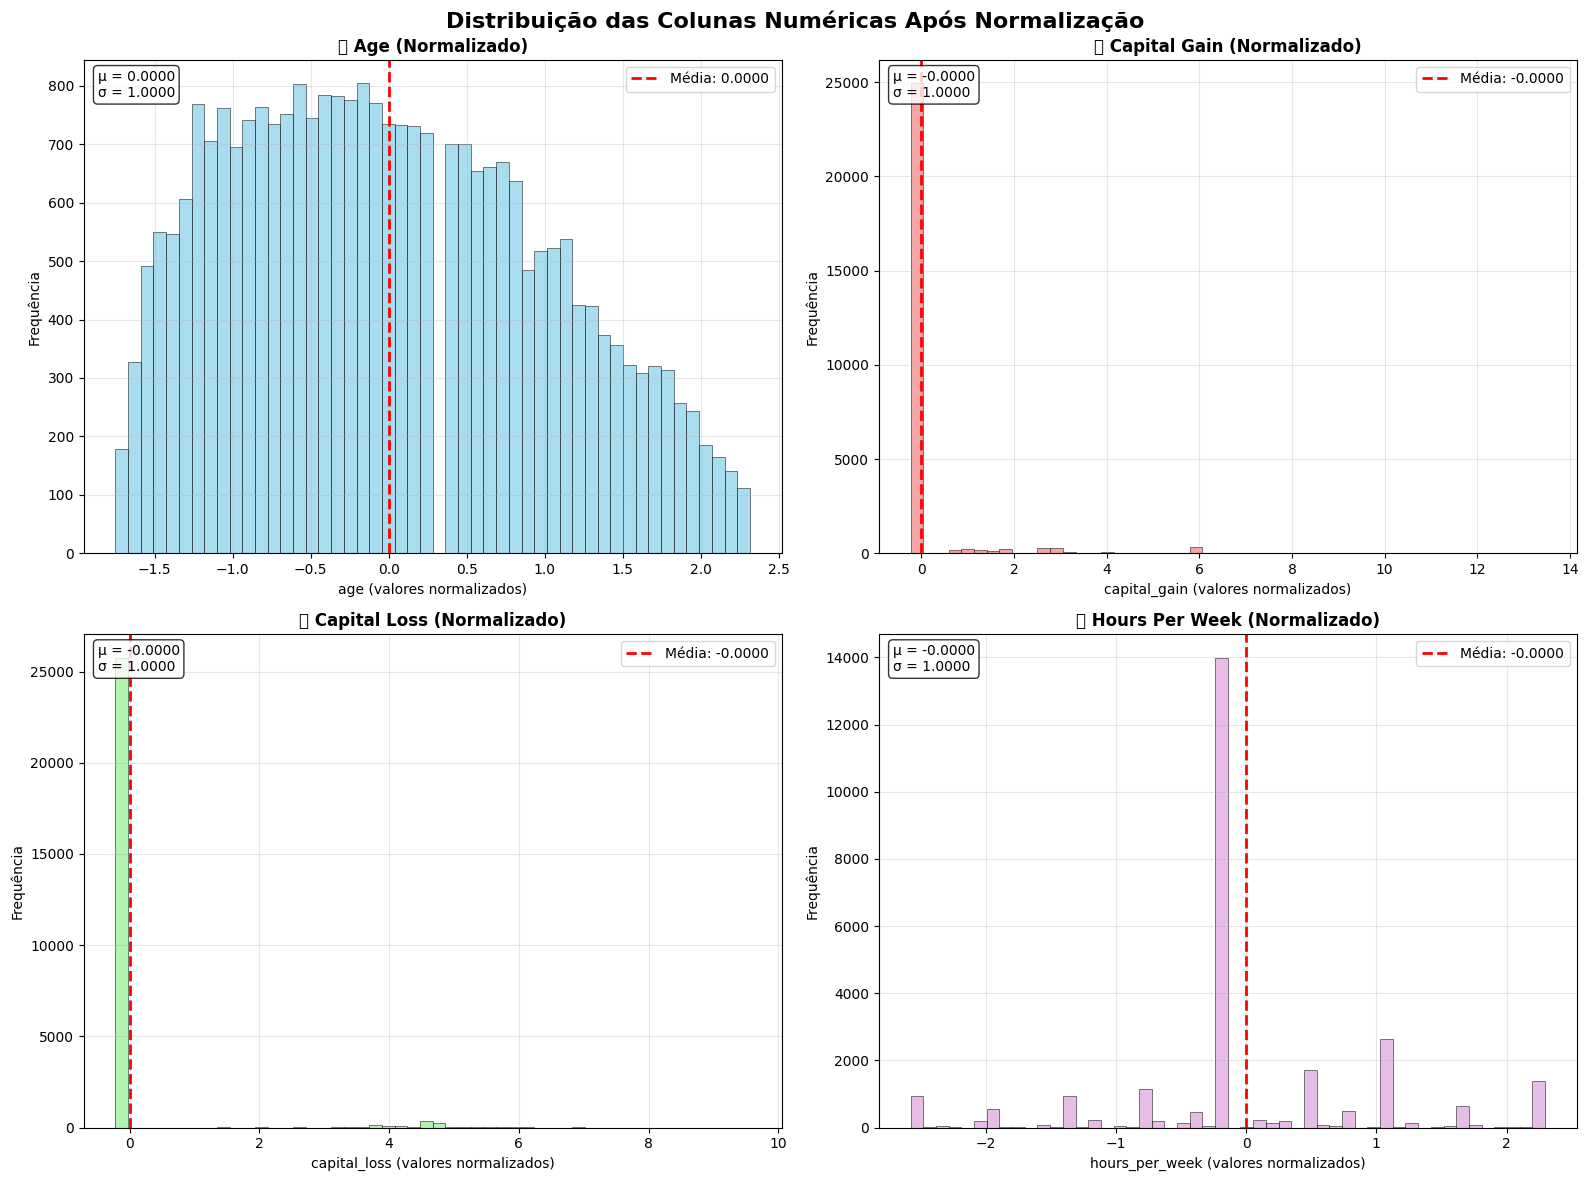

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(
    "Distribuição das Colunas Numéricas Após Normalização",
    fontsize=16,
    fontweight="bold",
)

cores = ["skyblue", "lightcoral", "lightgreen", "plum"]

for i, coluna in enumerate(colunas_numericas):
    row = i // 2
    col = i % 2

    # Plotar dados normalizados
    axes[row, col].hist(
        df_normalizado[coluna],
        bins=50,
        alpha=0.7,
        color=cores[i],
        edgecolor="black",
        linewidth=0.5,
    )

    axes[row, col].set_title(
        f'{coluna.replace("_", " ").title()} (Normalizado)', fontweight="bold"
    )
    axes[row, col].set_xlabel(f"{coluna} (valores normalizados)")
    axes[row, col].set_ylabel("Frequência")
    axes[row, col].grid(True, alpha=0.3)

    # Usar dados normalizados para cálculos
    media = df_normalizado[coluna].mean()
    axes[row, col].axvline(
        media, color="red", linestyle="--", linewidth=2, label=f"Média: {media:.4f}"
    )

    textstr = f"μ = {media:.4f}\nσ = {df_normalizado[coluna].std():.4f}"
    props = dict(boxstyle="round", facecolor="white", alpha=0.8)
    axes[row, col].text(
        0.02,
        0.98,
        textstr,
        transform=axes[row, col].transAxes,
        verticalalignment="top",
        bbox=props,
    )

    axes[row, col].legend()

plt.tight_layout()
plt.show()

## 4. Resultado Final

In [ ]:
# Usar os dados normalizados como resultado final
df_final = df_normalizado.copy()

print(f"DATASET FINAL PROCESSADO:")
print(f"Shape: {df_final.shape}")
print(f"\nPrimeiras 20 linhas do dataset final:")
print("=" * 80)
df_final.head(20)

📋 DATASET FINAL PROCESSADO:
Shape: (27034, 14)

📊 Primeiras 20 linhas do dataset final:


,age,workclass,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.112551,0,77516,13,0,0,0,0,0,0.637931,-0.217680,-0.140387,0,0
2,0.027791,1,215646,9,1,1,0,0,0,-0.235695,-0.217680,-0.140387,0,0
3,1.299186,1,234721,7,2,1,1,1,0,-0.235695,-0.217680,-0.140387,0,0
4,-0.819805,1,338409,13,2,2,2,1,1,-0.235695,-0.217680,-0.140387,1,0
5,-0.056968,1,284582,14,2,3,2,0,1,-0.235695,-0.217680,-0.140387,0,0
7,1.214427,2,209642,9,2,3,1,0,0,-0.235695,-0.217680,0.468741,0,1
8,-0.565526,1,45781,14,0,2,0,0,1,5.423989,-0.217680,1.077869,0,1
9,0.366830,1,159449,13,2,3,1,0,0,1.845095,-0.217680,-0.140387,0,1
11,-0.650286,0,141297,13,2,2,1,2,0,-0.235695,-0.217680,-0.140387,2,1
12,-1.243604,1,122272,13,0,0,3,0,1,-0.235695,-0.217680,-1.358644,0,0


## 5. Resumo do Pré-processamento

### Etapas Realizadas:
1. **Carregamento dos dados** - Dataset Adult/Census Income
2. **Remoção de colunas redundantes** - Removida coluna 'education' (duplicada com 'education_num')
3. **Limpeza de dados faltantes** - Removidas linhas com valores '?' ou NaN
4. **Remoção de outliers** - Análise e remoção de valores extremos nas colunas numéricas
5. **Codificação categórica** - Transformação de variáveis categóricas em números
6. **Normalização** - Padronização Z-score das colunas numéricas (média=0, desvio=1)

### Dados Finais:
- **Colunas numéricas normalizadas**: age, capital_gain, capital_loss, hours_per_week
- **Colunas categóricas codificadas**: workclass, marital_status, occupation, relationship, race, sex, native_country, income
- **Dados prontos para Machine Learning**